In [1]:
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
from sklearn import metrics
import os
import tensorflow as tf
from sklearn.cluster import MeanShift

In [5]:
img = cv2.imread("Train/original_retinal_images/IDRiD_07.jpg",0)
print(img.shape)

(2848, 4288)


In [3]:
from pylab import imshow
from pylab import plot

In [ ]:
img = Image.open("Train/original_retinal_images/IDRiD_07.jpg")
img = np.array(img)[:, :, :]
img_r = tf.reshape(img,[1,2848,4288,3])  
img_p1=tf.nn.max_pool(img_r, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                   padding='SAME')
img_p1 = tf.reshape(img_p1,[1424,2144,3])  
img_p1 = np.array(img_p1)
img_p2 = img_p1[:,:,:]
img_p1 = cv2.resize(img_p1, (0,0), fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
img_p2 = tf.reshape(img_p2,[1,1424,2144,3])  
img_p2=tf.nn.max_pool(img_p2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                   padding='SAME')
img_p2 = tf.reshape(img_p2,[712,1072,3])  
img_p2 =np.array(img_p2)
img_p2 = cv2.resize(img_p2, (0,0), fx=4, fy=4, interpolation=cv2.INTER_CUBIC)
d = (img + img_p1 + img_p2)/3 
g = d[:,:,0]
#Th = g.max()/2
#_,bnw = cv2.threshold(g, Th, 1, cv2.THRESH_BINARY)
g = m(d)
imshow(g)

(1, 2848, 4288, 1)


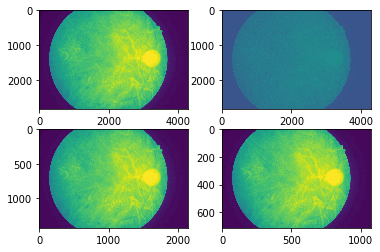

In [32]:
img = Image.open("Train/original_retinal_images/IDRiD_01.jpg")
img_ndarray = np.asarray(img, dtype='float32')
img_ndarray=img_ndarray[:,:,0]
plt.figure()
plt.subplot(221)
plt.imshow(img_ndarray)

w=[[-1.0,-1.0,-1.0],
   [-1.0,9.0,-1.0],
   [-1.0,-1.0,-1.0]]

with tf.compat.v1.Session() as sess:
    img_ndarray=tf.reshape(img_ndarray,[1,2848,4288,1])
    w=tf.reshape(w,[3,3,1,1])
    img_cov=tf.nn.conv2d(img_ndarray, w, strides=[1, 1, 1, 1], padding='SAME')
    image_data=sess.run(img_cov)
    print(image_data.shape)
    plt.subplot(222)
    plt.imshow(image_data[0,:,:,0])

    img_pool=tf.nn.max_pool(img_ndarray, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1],
                   padding='SAME')
    image_data = sess.run(img_pool)
    plt.subplot(223)
    plt.imshow(image_data[0, :, :, 0])
    plt.subplot(224)
    img_pool = tf.nn.max_pool(img_ndarray, ksize=[1, 4, 4, 1], strides=[1, 4, 4, 1],
                              padding='SAME')
    image_data = sess.run(img_pool)
    plt.imshow(image_data[0, :, :, 0])
    plt.show()